<a href="https://colab.research.google.com/github/Nayeemhabib/Titanic_Survival_Prediction/blob/main/Titanic_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all requires liberaries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

import seaborn as sns
sns.set(style = "white", color_codes = True)
sns.set(font_scale = 1.5)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [4]:
df_train = pd.read_csv("titanic_dataset.csv")
df_train.shape

(891, 12)

In [5]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [7]:
#S = Southhempton, #C= Cherborg, #Q = Quinstown.
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
# checking the null values in the data set as they reduce the performance of our model
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Passanger Name, PassengerId and Ticket are the Data variables for predicting the survivalibiltiy of the passenegers.
df_train = df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
# by dealing with the missing vlaues and age varoiables.
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [11]:
df_train.groupby(['Pclass']).mean()

<ipython-input-11-6114ce195425>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_train.groupby(['Pclass']).mean()


,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [12]:
# Replacing the node values in the data frame
df_train['Age'] = df_train[['Age','Pclass']].apply(age_approx, axis =1)

In [13]:
# Checking of any node value after the transfarmation.
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [14]:
# Two node variables in the embark which can be withdraw.
df_train.dropna(inplace = True)
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [15]:
# Checking data types of columns we observe.
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [16]:
# Converting the sex and Embarkment in the Categorical values.
df_train_dummied = pd.get_dummies(df_train, columns=["Sex"])

In [17]:
df_train_dummied = pd.get_dummies(df_train, columns=["Embarked"])

In [18]:
# Converitng the categorical into dummuies variables.
df_train_dummied.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,0,0,1
1,1,1,female,38.0,1,0,71.2833,1,0,0
2,1,3,female,26.0,0,0,7.9250,0,0,1
3,1,1,female,35.0,1,0,53.1000,0,0,1
4,0,3,male,35.0,0,0,8.0500,0,0,1
5,0,3,male,24.0,0,0,8.4583,0,1,0
6,0,1,male,54.0,0,0,51.8625,0,0,1
7,0,3,male,2.0,3,1,21.0750,0,0,1
8,1,3,female,27.0,0,2,11.1333,0,0,1
9,1,2,female,14.0,1,0,30.0708,1,0,0


<ipython-input-20-8f8a12b2eb42>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train_dummied.corr())


<Axes: >

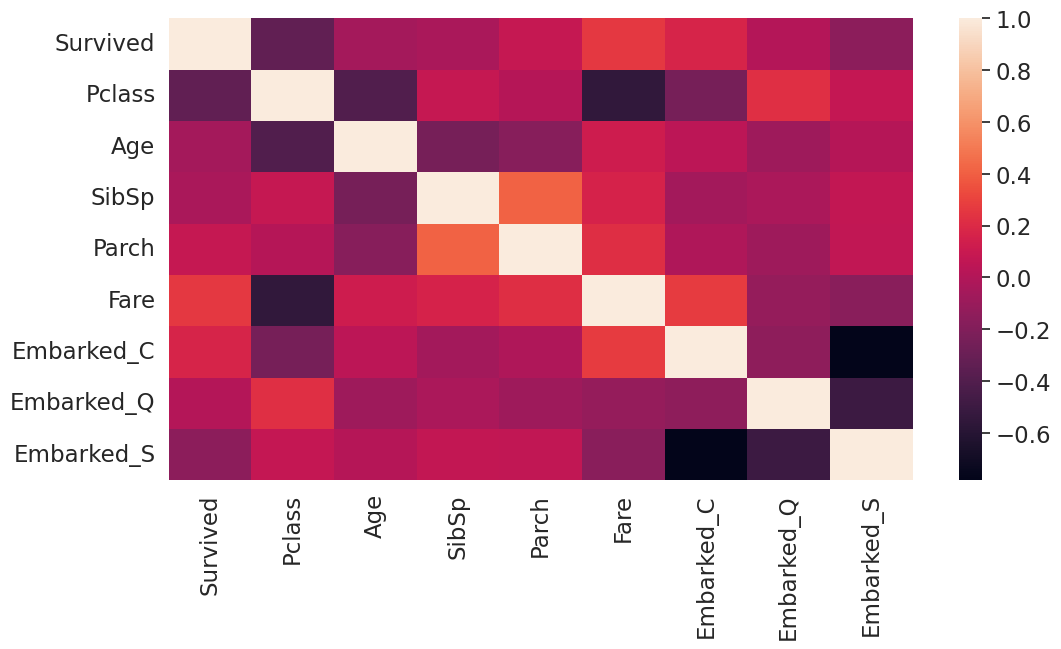

In [20]:
# Presenting relation in the given heat map
plt.figure(figsize=(12,6))
sns.heatmap(df_train_dummied.corr())

In [38]:
#  , "Sex_female", "Sex_male" these are the values one included in the data set.
used_features = ["Pclass", "Age", "SibSp", "Parch", "Embarked_C", "Embarked_S", "Embarked_Q"]
X = df_train_dummied[used_features].values
Y = df_train_dummied["Survived"]

In [29]:
X_train, X_test, Y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=2)

In [30]:
# Checking the shapes of Trian and Test Data sets.
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(y_test.shape)

(444, 7)
(445, 7)
(444,)
(445,)


In [32]:
#Instantiate and train the classifier using the given code.
logReg = LogisticRegression()
logReg.fit(X_train,Y_train)

LogisticRegression()

In [33]:
Y_pred = logReg.predict(X_test)
metrics.confusion_matrix(y_test,Y_pred)

array([[229,  41],
       [ 96,  79]])

In [34]:
metrics.accuracy_score(y_test, Y_pred)

0.6921348314606741

** Which basically is the accuracy of our model. Out of 100 it correctly predicted the 70% of survival of the Given passangers.**

In [35]:
# Otehr performance measures from the given confussion matrix.
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.70      0.85      0.77       270
           1       0.66      0.45      0.54       175

    accuracy                           0.69       445
   macro avg       0.68      0.65      0.65       445
weighted avg       0.69      0.69      0.68       445



** Overall the Algorithm has good precision and good recall score**

In [37]:
# Cofficient of the predicted line can be calculted by the given code as.
logReg.coef_

array([[-1.10711825, -0.04379627, -0.38575887,  0.24626146,  0.33967359,
        -0.39580665,  0.05358909]])

In [40]:
# intercept of the predicted line can be calculted by the given code as.
logReg.intercept_

array([3.54698275])

In [41]:
# further probabalities of the given algorithm are calculated as
df_train_dummied[used_features].columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_S',
       'Embarked_Q'],
      dtype='object')

In [42]:
# First is the entry has survived the label.
logReg.predict_proba(X_test)

array([[0.68393034, 0.31606966],
       [0.74836296, 0.25163704],
       [0.50185171, 0.49814829],
       [0.65192571, 0.34807429],
       [0.88898346, 0.11101654],
       [0.53940988, 0.46059012],
       [0.81147819, 0.18852181],
       [0.8555028 , 0.1444972 ],
       [0.71448622, 0.28551378],
       [0.63267876, 0.36732124],
       [0.64472458, 0.35527542],
       [0.44044546, 0.55955454],
       [0.81333922, 0.18666078],
       [0.77229034, 0.22770966],
       [0.77229034, 0.22770966],
       [0.33938112, 0.66061888],
       [0.58252617, 0.41747383],
       [0.91020953, 0.08979047],
       [0.49419272, 0.50580728],
       [0.80162381, 0.19837619],
       [0.50395353, 0.49604647],
       [0.89482578, 0.10517422],
       [0.49054189, 0.50945811],
       [0.85597239, 0.14402761],
       [0.46291654, 0.53708346],
       [0.74836296, 0.25163704],
       [0.68393034, 0.31606966],
       [0.70493688, 0.29506312],
       [0.20968895, 0.79031105],
       [0.23525069, 0.76474931],
       [0.